In [1]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import linregress
    import seaborn as sns

In [2]:
df = pd.read_csv("registro.csv", delimiter=';')

/tmp/ipython-input-1904300926.py:1: DtypeWarning: Columns (0,1,2,4,6,8,9,10,11,12,13,14,21,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("registro.csv", delimiter=';')


**Eliminacion de Filas en Blanco**

In [3]:
df = df.dropna(how='all').reset_index(drop=True)

In [4]:
df.tail(20)

,Anio_lectivo,Zona,Provincia,Cod_Provincia,Canton,Cod_Canton,Parroquia,Cod_Parroquia,Nombre_Institucion,AMIE,...,Total_Docentes,Estudiantes_Femenino,Estudiantes_Masculino,Total_Estudiantes,Ecuatoriana,Colombiana,Venezolana,Peruana,Otros_Paises_de_America,Otros_Continentes
322582,2024-2025 Inicio,Zona 5,SANTA ELENA,24.0,LA LIBERTAD,2402.0,LA LIBERTAD,240250.0,ESCUELA DE EDUCACION BASICA MARAÑON,24H00373,...,7.0,4.0,3.0,7.0,6.0,0.0,1.0,0.0,0.0,0.0
322583,2024-2025 Inicio,Zona 5,SANTA ELENA,24.0,SANTA ELENA,2401.0,CHANDUY,240153.0,ESCUELA DE EDUCACION BASICA SAN AGUSTIN,24H00374,...,12.0,110.0,122.0,232.0,228.0,0.0,4.0,0.0,0.0,0.0
322584,2024-2025 Inicio,Zona 5,SANTA ELENA,24.0,SALINAS,2403.0,JOSE LUIS TAMAYO,240352.0,ESCUELA DE EDUCACION BASICA EDUCA,24H00382,...,22.0,81.0,135.0,216.0,213.0,1.0,0.0,0.0,2.0,0.0
322585,2024-2025 Inicio,Zona 5,SANTA ELENA,24.0,SALINAS,2403.0,JOSE LUIS TAMAYO,240352.0,UNIDAD EDUCATIVA WALT WHITMAN,24H00383,...,14.0,74.0,89.0,163.0,161.0,0.0,2.0,0.0,0.0,0.0
322586,2024-2025 Inicio,Zona 5,SANTA ELENA,24.0,LA LIBERTAD,2402.0,LA LIBERTAD,240250.0,ESCUELA DE EDUCACION BASICA LAS AMERICAS,24H00386,...,3.0,5.0,6.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0
322587,2024-2025 Inicio,Zona 5,SANTA ELENA,24.0,SANTA ELENA,2401.0,CHANDUY,240153.0,ESCUELA DE EDUCACION BASICA SAN GERONIMO,24H00388,...,1.0,4.0,7.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0
322588,2024-2025 Inicio,Zona 5,SANTA ELENA,24.0,LA LIBERTAD,2402.0,LA LIBERTAD,240250.0,ESCUELA DE EDUCACION BASICA LUZ DEL SABER,24H00389,...,26.0,336.0,309.0,645.0,610.0,2.0,33.0,0.0,0.0,0.0
322589,2024-2025 Inicio,Zona 5,SANTA ELENA,24.0,SANTA ELENA,2401.0,CHANDUY,240153.0,ESCUELA DE EDUCACION BASICA JOSE ABEL CASTILLO,24H00391,...,1.0,10.0,10.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0
322590,2024-2025 Inicio,Zona 5,SANTA ELENA,24.0,SANTA ELENA,2401.0,COLONCHE,240152.0,UNIDAD EDUCATIVA SAN ALBERTO MAGNO,24H00396,...,9.0,152.0,131.0,283.0,283.0,0.0,0.0,0.0,0.0,0.0
322591,2024-2025 Inicio,Zona 5,SANTA ELENA,24.0,SANTA ELENA,2401.0,SANTA ELENA,240102.0,ESCUELA DE EDUCACION BASICA ALBERT EINSTEIN,24H00397,...,14.0,141.0,139.0,280.0,279.0,0.0,1.0,0.0,0.0,0.0




# **Limpiesa de Datos**


1. **Corregir el formato de la columna Anio_lectivo**

Actualmente, los valores son como "2009-2010 Inicio".

In [5]:
# Extraer el año de inicio (primeros 4 caracteres)
df['anio'] = df['Anio_lectivo'].str[:4].astype(int)

 Esto permite agrupar por año (2009, 2010, ..., 2025).


 2. Verificar y corregir valores nulos o cero en **Total_Estudiantes**


En la muestra, hay instituciones con Total_Estudiantes = 0 o valores muy bajos (ej: 3 estudiantes).

Pregunta clave:  **¿Son datos reales o errores?**

In [6]:
df = df[df['Total_Estudiantes'] > 0]

________________________________________________________________________________

3. **Validar consistencia en Area (Rural vs. Urbana)**

En la muestra, Area tiene valores como "Urbana" y "Rural"

**Verificar que no haya errores tipográficos:**

In [8]:
print(df['Area'].unique())
# Salida esperada: ['Urbana', 'Rural']

['Urbana' 'Rural']


Si hay valores extraños (ej: "URBANA", "rural"), estandarízalos:

In [9]:
df['Area'] = df['Area'].str.capitalize()  # 'Urbana', 'Rural'

4. **Verificar duplicados**

In [10]:
# Contar duplicados por institución y año
duplicados = df.duplicated(subset=['AMIE', 'anio'], keep=False)
print(f"Duplicados encontrados: {duplicados.sum()}")

Duplicados encontrados: 4


In [11]:
df = df.drop_duplicates(subset=['AMIE', 'anio'], keep='last')

5. **Manejo de valores atípicos (outliers)**

En la muestra, hay instituciones con **más de 2,000 estudiantes** (ej: "LA ASUNCION" con 2,680).


**Esto no es un error:** son colegios grandes en zonas urbanas.

6. **Verificar consistencia en Provincia**

Asegurarse de que los nombres de provincias estén estandarizados (ej: "AZUAY" en mayúsculas).

In [12]:
df['Provincia'] = df['Provincia'].str.upper()

**Preparación para la visualización**

Después de la limpieza, agrupa los datos para la visualización:

In [13]:
# Por provincia
matricula_provincia = df.groupby(['anio', 'Provincia'])['Total_Estudiantes'].sum().reset_index()

# Por zona
matricula_zona = df.groupby(['anio', 'Area'])['Total_Estudiantes'].sum().reset_index()

Antes de graficar, verificamos que los datos tengan sentido:

In [14]:
# Verificar rango de años
print(f"Años: {df['anio'].min()} - {df['anio'].max()}")

# Verificar total de estudiantes por año
print(df.groupby('anio')['Total_Estudiantes'].sum().head())

Años: 2009 - 2024
anio
2009    4103224.0
2010    4227768.0
2011    4380546.0
2012    4449216.0
2013    4560138.0
Name: Total_Estudiantes, dtype: float64


In [ ]:
########Visualizacion

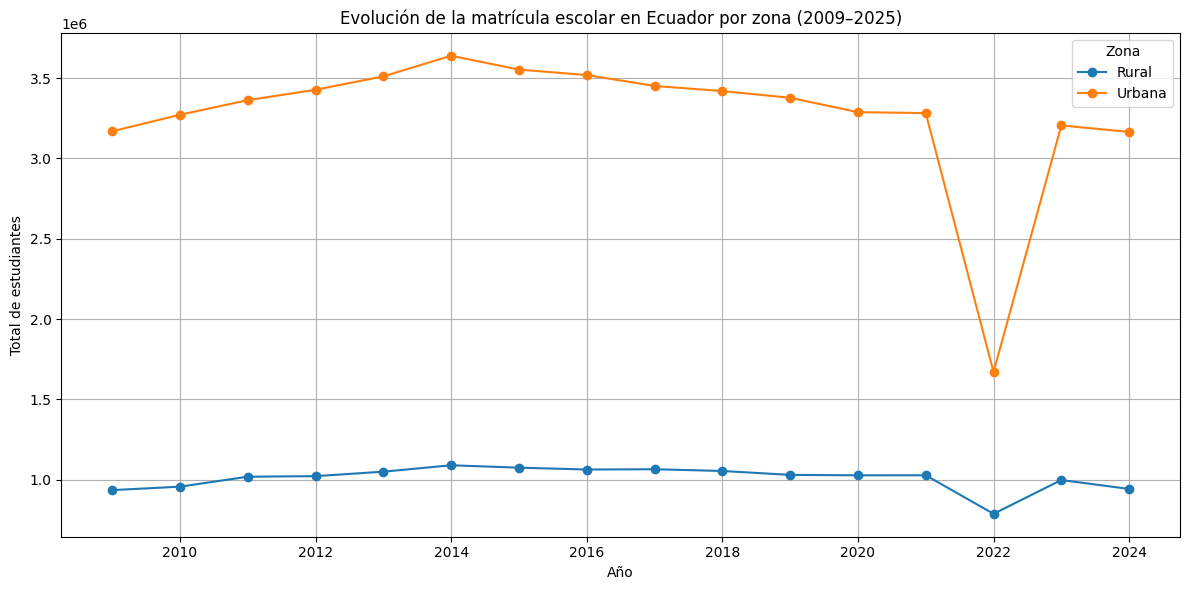

In [15]:
# 1. Por zona
matricula_zona = df.groupby(['anio', 'Area'])['Total_Estudiantes'].sum().unstack()

plt.figure(figsize=(12, 6))
plt.plot(matricula_zona.index, matricula_zona['Rural'], label='Rural', marker='o')
plt.plot(matricula_zona.index, matricula_zona['Urbana'], label='Urbana', marker='o')
plt.title("Evolución de la matrícula escolar en Ecuador por zona (2009–2025)")
plt.xlabel("Año")
plt.ylabel("Total de estudiantes")
plt.legend(title="Zona")
plt.grid(True)
plt.tight_layout()
plt.show()



**Evolucion Matricula Escolar por Zona y Top 5 de Provincias**

In [16]:
# 2. Agrupar por año, provincia y zona
matricula = df.groupby(['anio', 'Provincia', 'Area'])['Total_Estudiantes'].sum().reset_index()


In [17]:
# 3. Seleccionar top 5 provincias por matrícula total
top_provincias = matricula.groupby('Provincia')['Total_Estudiantes'].sum().nlargest(5).index
df_top = matricula[matricula['Provincia'].isin(top_provincias)]

In [43]:
# 4. Separar zonas
df_rural = df_top[df_top['Area'] == 'Rural']
df_urbana = df_top[df_top['Area'] == 'Urbana']

In [44]:
top_provincias

Index(['GUAYAS', 'PICHINCHA', 'MANABI', 'LOS RIOS', 'AZUAY'], dtype='object', name='Provincia')

In [45]:
matricula.head(20)

,anio,Provincia,Area,Total_Estudiantes
0,2009,AZUAY,Rural,57895.0
1,2009,AZUAY,Urbana,141782.0
2,2009,BOLIVAR,Rural,18687.0
3,2009,BOLIVAR,Urbana,39291.0
4,2009,CARCHI,Rural,13362.0
5,2009,CARCHI,Urbana,32267.0
6,2009,CAÑAR,Rural,22236.0
7,2009,CAÑAR,Urbana,48488.0
8,2009,CHIMBORAZO,Rural,38875.0
9,2009,CHIMBORAZO,Urbana,91798.0


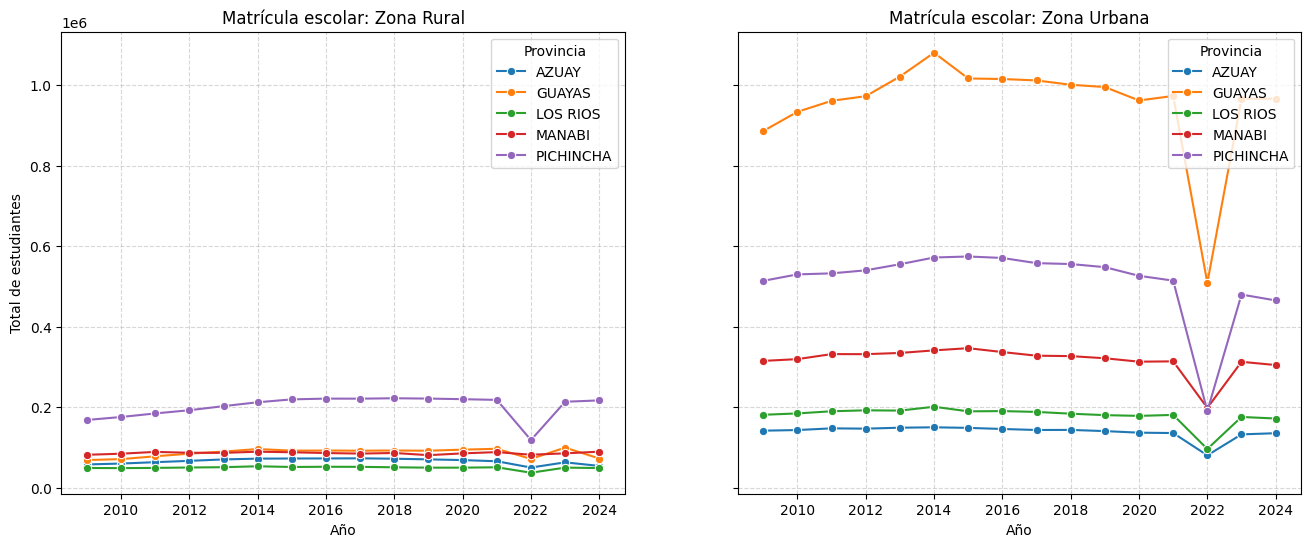

In [46]:
# 5. Crear subgráficos separados
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Gráfico rural
sns.lineplot(
    data=df_rural,
    x='anio',
    y='Total_Estudiantes',
    hue='Provincia',
    marker='o',
    ax=axes[0]
)
axes[0].set_title("Matrícula escolar: Zona Rural")
axes[0].set_xlabel("Año")
axes[0].set_ylabel("Total de estudiantes")
axes[0].legend(title="Provincia")
axes[0].grid(True, linestyle='--', alpha=0.5)

# Gráfico urbano
sns.lineplot(
    data=df_urbana,
    x='anio',
    y='Total_Estudiantes',
    hue='Provincia',
    marker='o',
    ax=axes[1]
)
axes[1].set_title("Matrícula escolar: Zona Urbana")
axes[1].set_xlabel("Año")
axes[1].set_ylabel("")
axes[1].legend(title="Provincia")
axes[1].grid(True, linestyle='--', alpha=0.5)


**Evolución de Relacion Estudiantes/Docentes en Ecuador por zona (2009–2025):**

In [22]:
###
df['estudiantes_por_docente'] = df['Total_Estudiantes'] / df['Total_Docentes']

In [23]:
estudiantes_por_docente= df[df['Total_Docentes']>0]

In [24]:
estudiantes_por_docentes_area =estudiantes_por_docente.groupby(['anio', 'Area'])['estudiantes_por_docente'].sum().unstack()

In [ ]:
estudiantes_por_docentes_area.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 2009 to 2024
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rural   16 non-null     float64
 1   Urbana  16 non-null     float64
dtypes: float64(2)
memory usage: 384.0 bytes


In [28]:
estudiantes_por_docentes_area

Area,Rural,Urbana
anio,,
2009,204786.285324,292677.310564
2010,186889.609356,272974.708616
2011,194501.206695,279460.934412
2012,185158.988190,273507.988220
2013,180792.790585,258473.201206
2014,180684.750653,250590.781637
2015,155859.616924,202224.544416
2016,146281.329021,189994.062864
2017,134951.192635,176481.997432


In [36]:
 df_est_doc = estudiantes_por_docentes_area.groupby(['anio', 'Rural', 'Urbana']).size().reset_index()

In [89]:
df_est_doc['Rural'].to_numpy()

array([204786.2853243 , 186889.60935565, 194501.20669481, 185158.98819   ,
       180792.79058455, 180684.75065268, 155859.61692385, 146281.32902064,
       134951.19263479, 128191.16704808, 122580.04360896, 123740.11072581,
       125071.21414514, 116226.49456568, 112798.57332978, 106451.59341111])

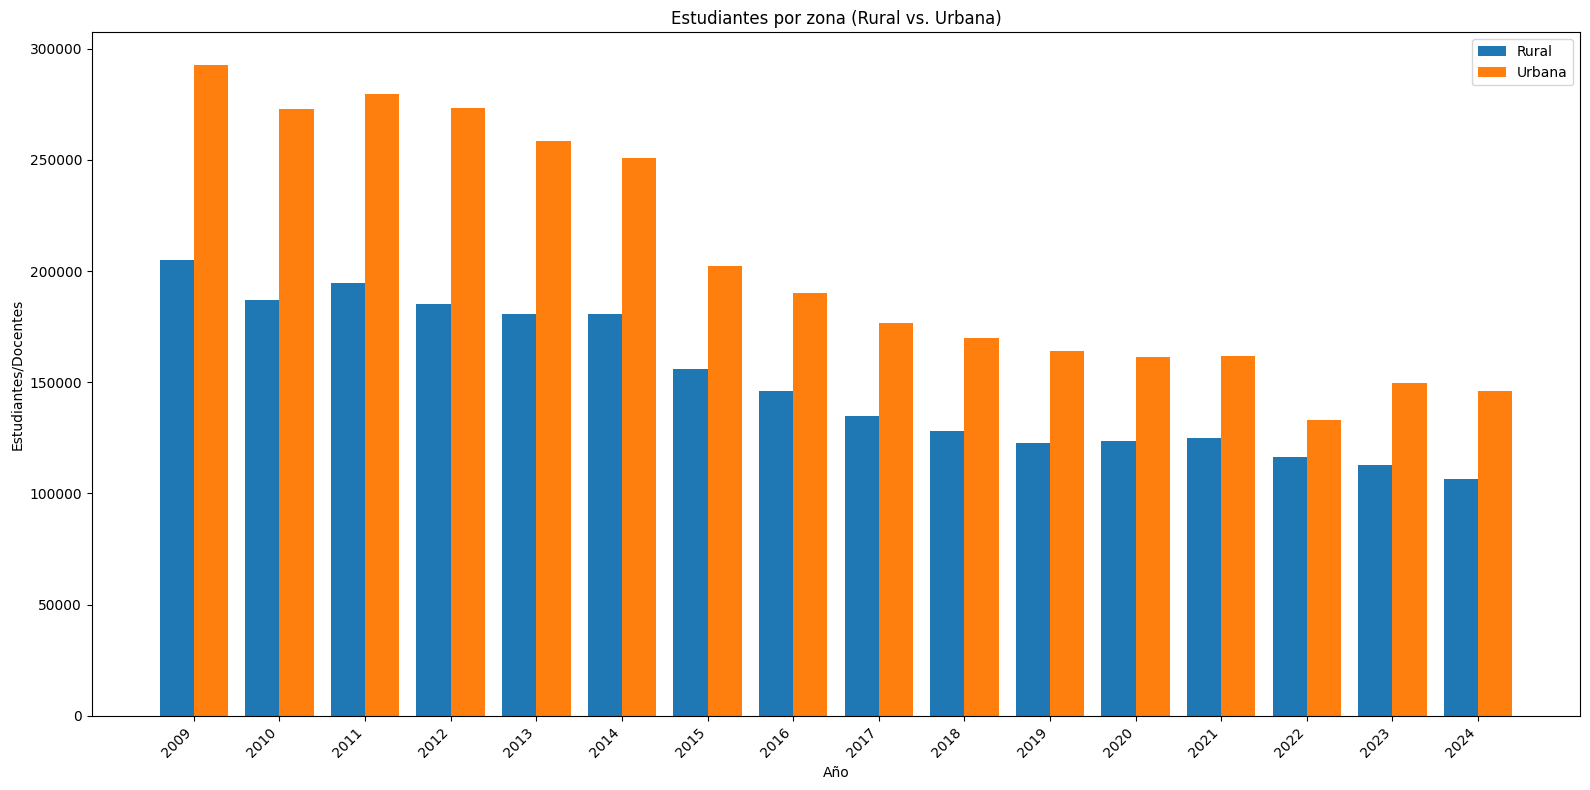

In [40]:

x = np.arange(len(df_est_doc['anio']))
width = 0.4

# Crear UNA SOLA figura, con el tamaño deseado
fig, ax = plt.subplots(figsize=(16, 8))  # ← Ajusta aquí el tamaño (ej: 16 de ancho)

rects1 = ax.bar(x - width/2, df_est_doc['Rural'].to_numpy(), width, label='Rural')
rects2 = ax.bar(x + width/2, df_est_doc['Urbana'].to_numpy(), width, label='Urbana')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Estudiantes/Docentes')
ax.set_xlabel('Año')
ax.set_title('Estudiantes por zona (Rural vs. Urbana)')
ax.set_xticks(x)
ax.set_xticklabels(df_est_doc['anio'], rotation=45, ha='right')
ax.legend()

# Rotar etiquetas del eje X
plt.xticks(rotation=45, ha='right')

fig.tight_layout()

plt.show()

**Evolución de Relacion Estudiantes/Docentes en Ecuador por zona y Top 5 de Provincias (2009–2025):**

**Número de instituciones educativas por Top 5 de Provincias**

---



In [78]:
instituciones = df.groupby(['anio', 'Provincia', 'Area'])['Nombre_Institucion'].count().reset_index()

In [66]:
instituciones

,anio,Provincia,Area,Nombre_Institucion
0,2009,AZUAY,Rural,526
1,2009,AZUAY,Urbana,560
2,2009,BOLIVAR,Rural,361
3,2009,BOLIVAR,Urbana,391
4,2009,CARCHI,Rural,230
...,...,...,...,...
773,2024,TUNGURAHUA,Rural,130
774,2024,TUNGURAHUA,Urbana,159
775,2024,ZAMORA CHINCHIPE,Rural,179
776,2024,ZAMORA CHINCHIPE,Urbana,127


In [79]:

top_provincias_inst = instituciones.groupby('Provincia')['Nombre_Institucion'].sum().nlargest(5).index

In [80]:
df_top_provincias_inst = instituciones[instituciones['Provincia'].isin(top_provincias_inst)]

In [82]:
# 4. Separar zonas
df_rural_inst = df_top_provincias_inst[df_top_provincias_inst['Area'] == 'Rural']
df_urbana_inst = df_top_provincias_inst[df_top_provincias_inst['Area'] == 'Urbana']

In [83]:
df_top_provincias_inst

,anio,Provincia,Area,Nombre_Institucion
18,2009,GUAYAS,Rural,687
19,2009,GUAYAS,Urbana,4202
22,2009,LOJA,Rural,860
23,2009,LOJA,Urbana,631
24,2009,LOS RIOS,Rural,568
...,...,...,...,...
754,2024,LOS RIOS,Urbana,589
755,2024,MANABI,Rural,972
756,2024,MANABI,Urbana,1196
765,2024,PICHINCHA,Rural,680


In [86]:
df_rural_inst

,anio,Provincia,Area,Nombre_Institucion
18,2009,GUAYAS,Rural,687
22,2009,LOJA,Rural,860
24,2009,LOS RIOS,Rural,568
26,2009,MANABI,Rural,1502
36,2009,PICHINCHA,Rural,887
...,...,...,...,...
747,2024,GUAYAS,Rural,399
751,2024,LOJA,Rural,680
753,2024,LOS RIOS,Rural,248
755,2024,MANABI,Rural,972


In [91]:
df_urbana_inst

,anio,Provincia,Area,Nombre_Institucion
19,2009,GUAYAS,Urbana,4202
23,2009,LOJA,Urbana,631
25,2009,LOS RIOS,Urbana,1181
27,2009,MANABI,Urbana,2649
37,2009,PICHINCHA,Urbana,1751
...,...,...,...,...
748,2024,GUAYAS,Urbana,2204
752,2024,LOJA,Urbana,412
754,2024,LOS RIOS,Urbana,589
756,2024,MANABI,Urbana,1196


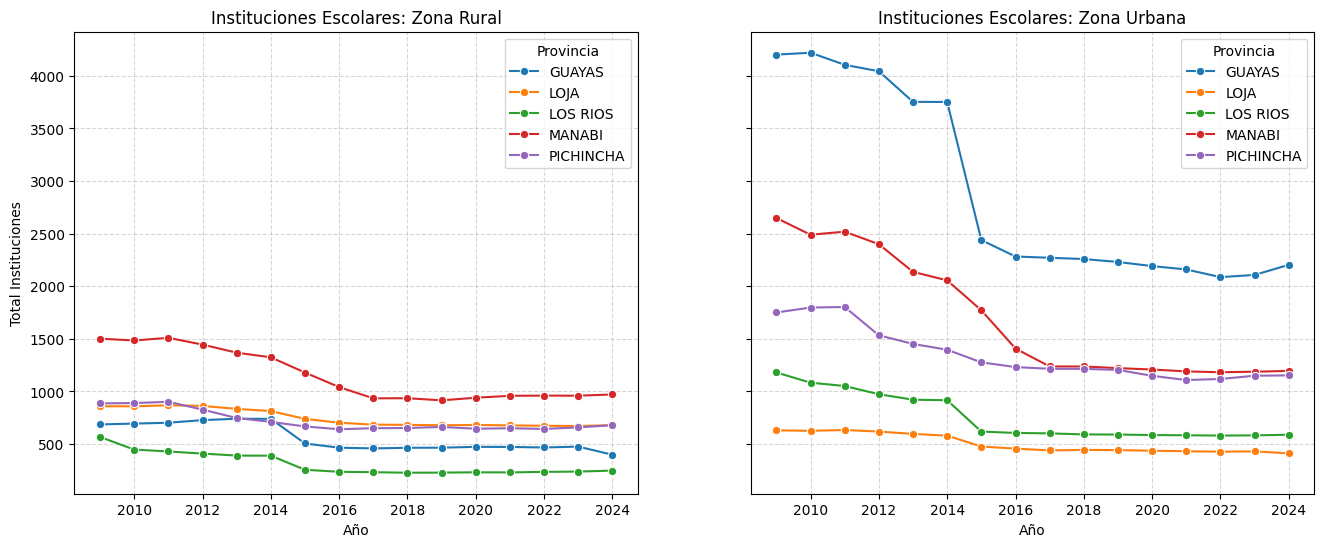

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Gráfico rural
sns.lineplot(
    data=df_rural_inst,
    x='anio',
    y='Nombre_Institucion',
    hue='Provincia',
    marker='o',
    ax=axes[0]
)
axes[0].set_title("Instituciones Escolares: Zona Rural")
axes[0].set_xlabel("Año")
axes[0].set_ylabel("Total Instituciones")
axes[0].legend(title="Provincia")
axes[0].grid(True, linestyle='--', alpha=0.5)

# Gráfico urbano
sns.lineplot(
    data=df_urbana_inst,
    x='anio',
    y='Nombre_Institucion',
    hue='Provincia',
    marker='o',
    ax=axes[1]
)
axes[1].set_title("Instituciones Escolares: Zona Urbana")
axes[1].set_xlabel("Año")
axes[1].set_ylabel("Total Instituciones")
axes[1].legend(title="Provincia")
axes[1].grid(True, linestyle='--', alpha=0.5)